In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
df.corr

<bound method DataFrame.corr of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# there are no null values present in the data set
# there is an outlier in index number 445
# in insulin there are three outliers above 600  

In [8]:
df[df['DiabetesPedigreeFunction']==2.42]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78,63,14,59.4,2.42,25,1


In [9]:
x = df.drop(columns='Outcome')
y = df['Outcome']


In [10]:
x.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [11]:
x_colums=x.columns
x_colums

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [12]:
Mean_change = ['BMI','Glucose','BloodPressure','SkinThickness','Insulin']
for i in Mean_change:
    x[i]=x[i].replace(0,x[i].mean())

In [13]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [14]:
x_new=x.copy()
for i in x_new.columns:
  p25=x_new[i].quantile(0.25)
  p75=x_new[i].quantile(0.75)
  iqr=p75-p25
  upper_limit=p75+1.5*iqr
  lower_limit=p25-1.5*iqr
  x_new[i]=x_new[i].clip(lower_limit,upper_limit)

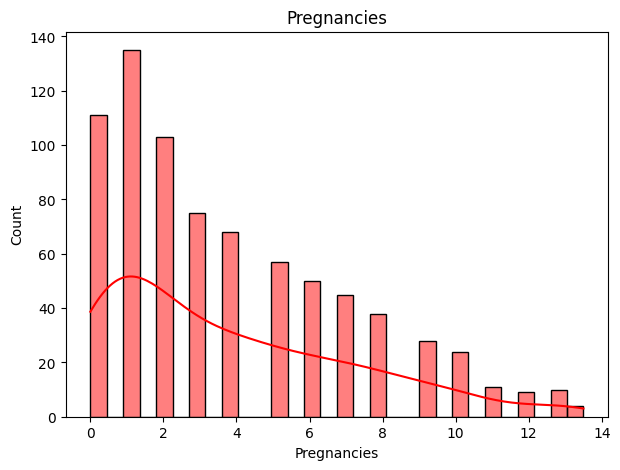

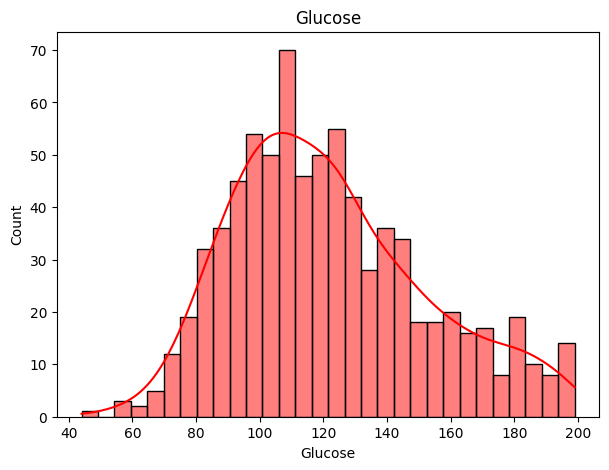

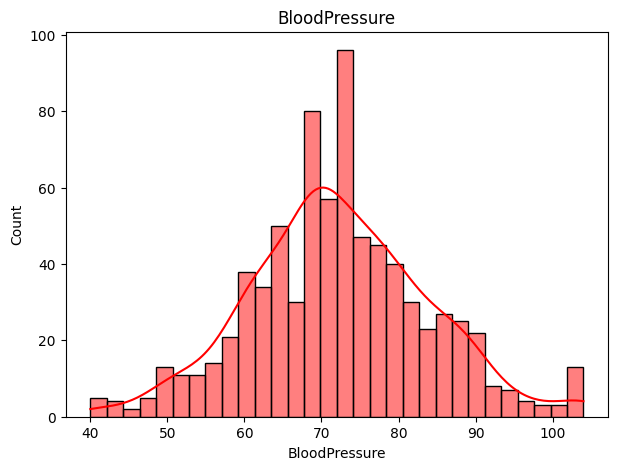

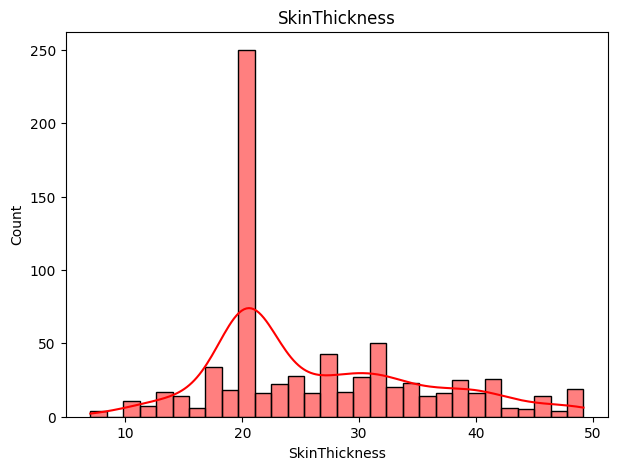

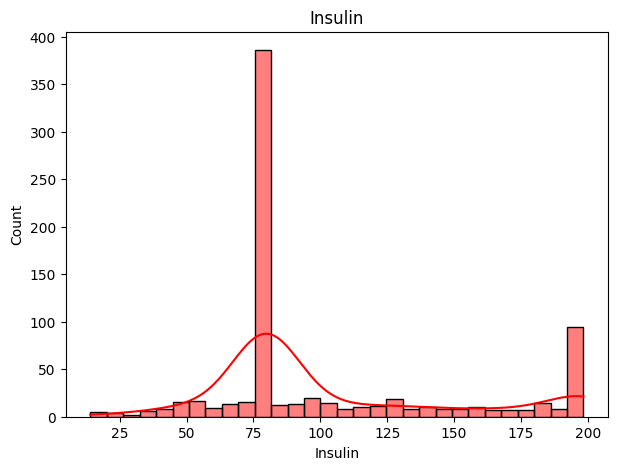

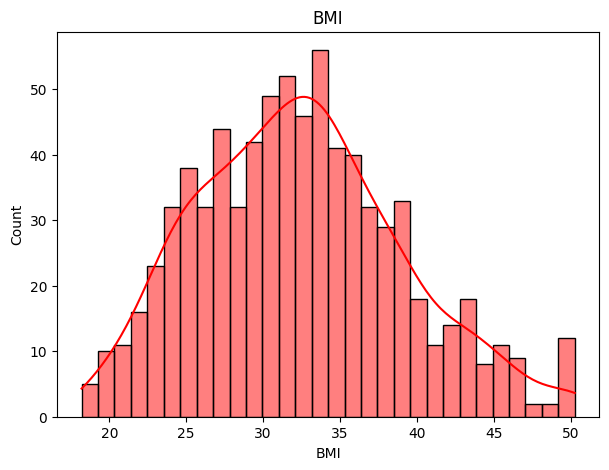

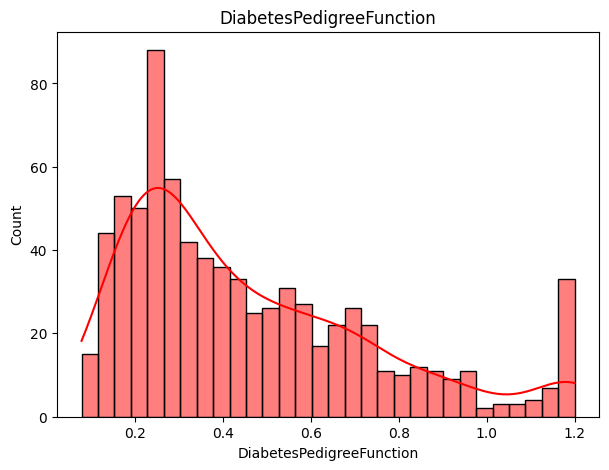

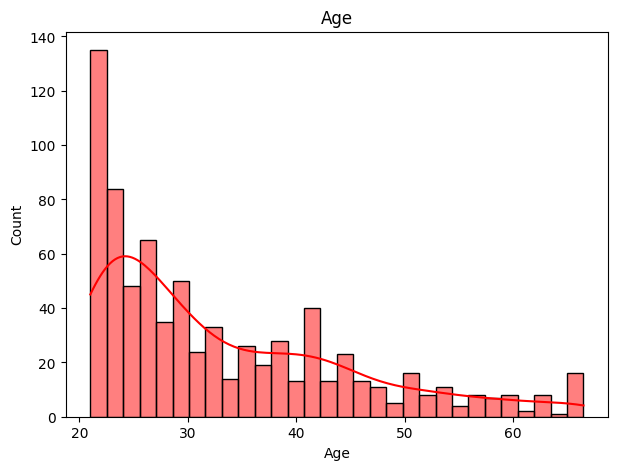

In [15]:
for i in x_colums:
    plt.figure(figsize=(7, 5)) 
    sns.histplot(x_new[i], bins=30, kde=True, color='red')
    plt.title(i)
    plt.show()

In [16]:
x_log_data=x_colums.drop("Pregnancies")

In [17]:
x_log_data

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

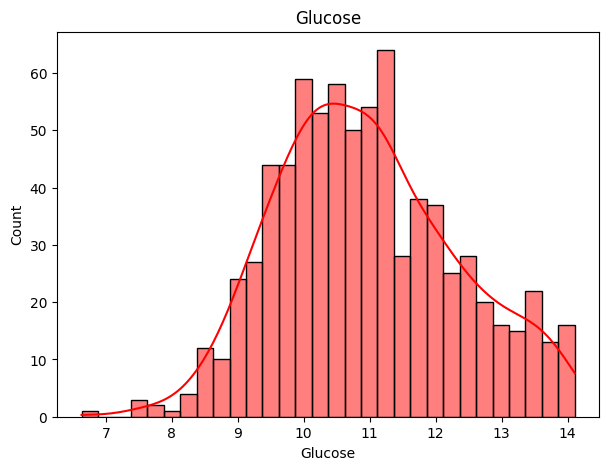

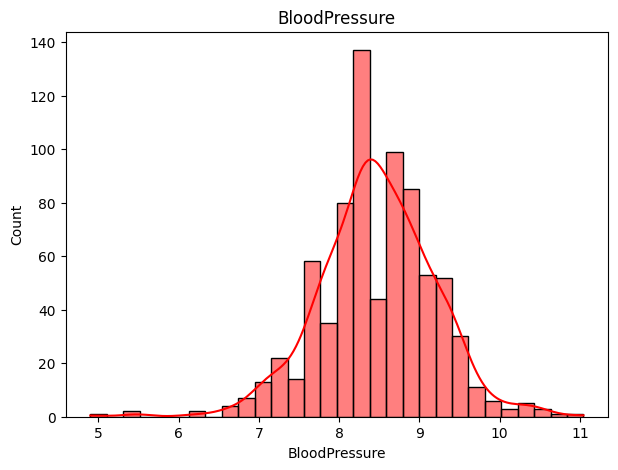

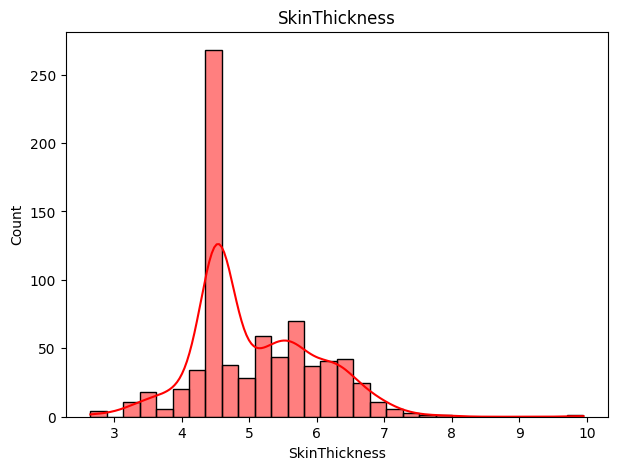

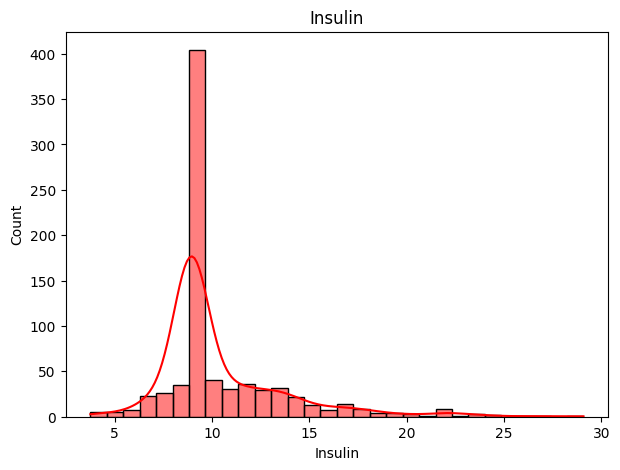

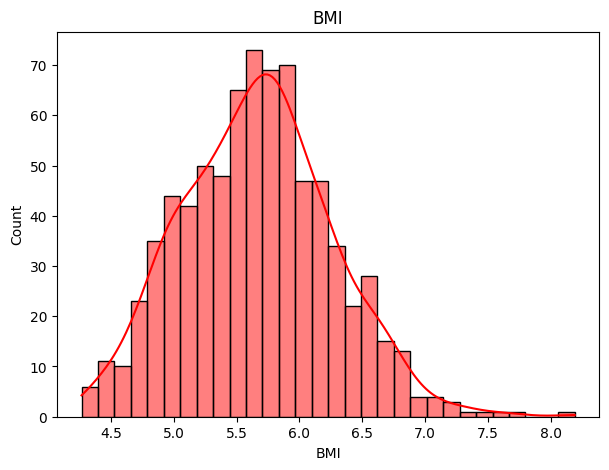

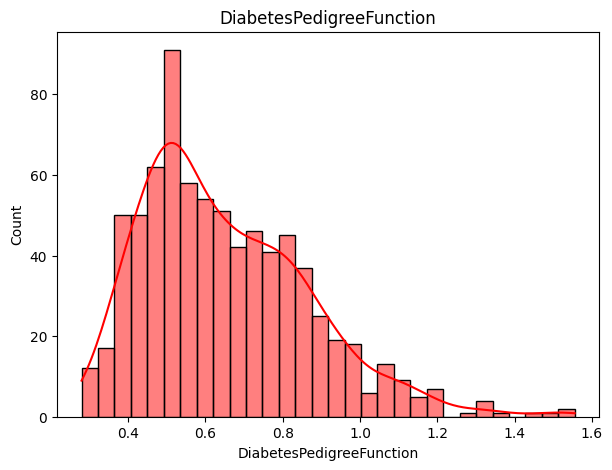

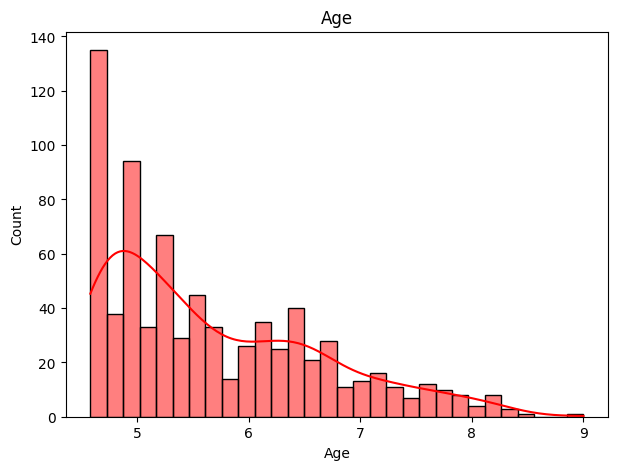

In [18]:
for i in x_log_data:
    x_new[i]=np.sqrt(x[i])
    plt.figure(figsize=(7, 5))  # Optional: set figure size
    sns.histplot(x_new[i], bins=30, kde=True, color='red')
    plt.title(i)
    plt.show()
    

In [19]:
x_new["Pregnancies"]=np.sqrt(x_new["Pregnancies"])

<Axes: >

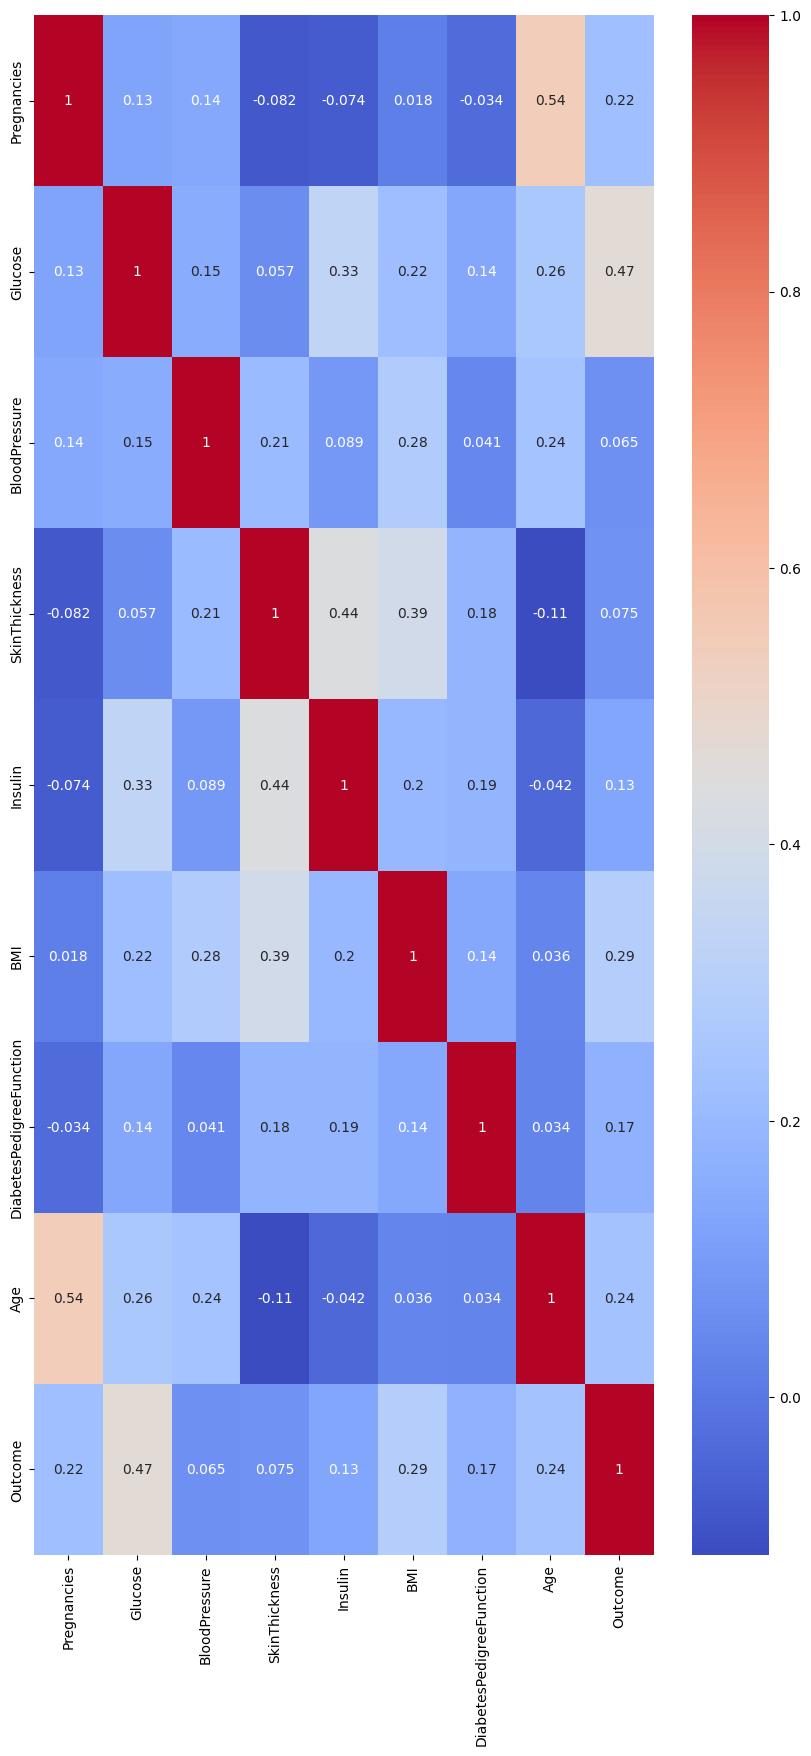

In [20]:
plt.figure(figsize=(10, 20))
x_coo=df.corr()
sns.heatmap(x_coo,annot=True, cmap='coolwarm')

In [21]:
x_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,1.694458,10.946291,8.469711,5.079726,10.380606,5.665233,0.651989,5.684821
std,0.983519,1.364822,0.720751,0.896610,3.304148,0.596992,0.216445,0.961720
min,0.000000,6.633250,4.898979,2.645751,3.741657,4.266146,0.279285,4.582576
25%,1.000000,9.987469,8.000000,4.531717,8.933055,5.244044,0.493710,4.898979
50%,1.732051,10.816654,8.485281,4.795832,8.933055,5.656854,0.610327,5.385165
75%,2.449490,11.842705,8.944272,5.656854,11.280498,6.049793,0.791360,6.403124
max,3.674235,14.106736,11.045361,9.949874,29.086079,8.191459,1.555635,9.000000


In [22]:
x_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.449490,12.165525,8.485281,5.916080,8.933055,5.796551,0.791833,7.071068
1,1.000000,9.219544,8.124038,5.385165,8.933055,5.157519,0.592453,5.567764
2,2.828427,13.527749,8.000000,4.531717,8.933055,4.827007,0.819756,5.656854
3,1.000000,9.433981,8.124038,4.795832,9.695360,5.300943,0.408656,4.582576
4,0.000000,11.704700,6.324555,5.916080,12.961481,6.565059,1.512614,5.744563
...,...,...,...,...,...,...,...,...
763,3.162278,10.049876,8.717798,6.928203,13.416408,5.735852,0.413521,7.937254
764,1.414214,11.045361,8.366600,5.196152,8.933055,6.066300,0.583095,5.196152
765,2.236068,11.000000,8.485281,4.795832,10.583005,5.118594,0.494975,5.477226
766,1.000000,11.224972,7.745967,4.531717,8.933055,5.486347,0.590762,6.855655


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [24]:
num_data=x_new.select_dtypes(exclude="object").columns
num_data

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [25]:
num_pipeline=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaling",StandardScaler())
])

In [26]:
colum_trans=ColumnTransformer(transformers=[
    ("prep",num_pipeline,num_data)
],remainder="passthrough")

In [27]:
preprossing=Pipeline(steps=[
    ("preprossing",colum_trans)
])

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,random_state=42,test_size=0.2)

In [29]:
x_train_new=preprossing.fit_transform(x_train)
x_test_new=preprossing.transform(x_test)

In [30]:
modellg=LogisticRegression()
modellg.fit(x_train_new,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
y_pred=modellg.predict(x_test_new)


In [32]:
r2_score=accuracy_score(y_test,y_pred)
r2_score

0.7727272727272727

In [33]:
from imblearn.ensemble import BalancedRandomForestClassifier


brf = BalancedRandomForestClassifier(n_estimators=200, random_state=42,max_depth=14,sampling_strategy="all")


brf.fit(x_train_new, y_train)


y_pred1 = brf.predict(x_test_new)
y_pred1


array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [34]:
y_pred1=brf.predict(x_test_new)

In [35]:
r2_score1=accuracy_score(y_test,y_pred1)
r2_score1

0.7727272727272727

In [36]:
from xgboost import XGBClassifier
xgb1=XGBClassifier(
    n_estimators=400,
    max_depth=15,
    learning_rate=0.20,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    
)
xgb1.fit(x_train_new,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [37]:
xgb_hat=xgb1.predict(x_test_new)
xgb_hat

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [38]:
accuracy_score(y_test,xgb_hat)

0.7532467532467533

In [39]:
from imblearn.over_sampling import SMOTE
SMOTE=SMOTE()
x_res,y_res=SMOTE.fit_resample(x_new,y)

In [40]:
y_res.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [41]:
x_res.shape

(1000, 8)

In [42]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,random_state=42,test_size=0.2)

In [43]:
x_train_new2=preprossing.fit_transform(x_train1)
x_test_new2=preprossing.transform(x_test1)

In [44]:
from sklearn.ensemble import RandomForestClassifier
modelrf=RandomForestClassifier(n_estimators=100,max_depth=12,min_samples_leaf=3,random_state=42,n_jobs=-1,max_features=3)
modelrf.fit(x_train_new2,y_train1)


,n_estimators,100
,criterion,'gini'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_hat=modelrf.predict(x_test_new2)

In [58]:
roc=accuracy_score(y_test1,y_hat)
roc

0.815

In [46]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [47]:
y_hat

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1])

In [48]:
roc=accuracy_score(y_test1,y_hat)
roc

0.815

In [49]:
from xgboost import XGBClassifier
xgb=XGBClassifier(
    n_estimators=400,
    max_depth=15,
    learning_rate=0.33,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    
)
xgb.fit(x_train_new2,y_train1)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [59]:
y_hat3=xgb.predict(x_test_new2)


In [51]:
xgbscore=accuracy_score(y_test1,y_hat3)
xgbscore

0.78

In [52]:
import joblib

# Save the model to a file
model_filename = "randomforestclas_model.pkl"
joblib.dump(modelrf, model_filename)

# The model is saved in the current working directory
print(f"Model saved to: {model_filename}")


Model saved to: randomforestclas_model.pkl


In [53]:
loaded_model = joblib.load(model_filename)


In [54]:
model_filename

'randomforestclas_model.pkl'

In [55]:
import sklearn
print(sklearn.__version__)

1.7.2


In [56]:
import pickle

with open('modelrf.pkl', 'rb') as f:
    modelrf = pickle.load(f)


FileNotFoundError: [Errno 2] No such file or directory: 'modelrf.pkl'

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
modelrf=RandomForestClassifier(n_estimators=100,max_depth=12,min_samples_leaf=3,random_state=42,n_jobs=-1,max_features=3)
modelrf.fit(x_train_new2,y_train1)
y_hat=modelrf.predict(x_test_new2)
roc=accuracy_score(y_test1,y_hat)

with open('random_model.pkl', 'wb') as f:
    pickle.dump(modelrf, f)


In [ ]:
x_new.shape


(768, 8)

In [ ]:

x.head()








,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
